# **Data Challenge DSW 2023**

## *Senior Professional Category*

---

# Data Preparation

## Load required libraries

Note that we will need to install these libraries if we have never used these before.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Custom tick formatting
from matplotlib.ticker import FuncFormatter

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 1.5.3
Matplotlib 3.7.1
Seaborn 0.12.2


---

## Load data with pandas

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load Product Catalog and Name data
Product_Catalog = pd.read_excel('/content/drive/MyDrive/DSW/Product Catalog.xlsx')
Product_Name = pd.read_excel('/content/drive/MyDrive/DSW/Product Name from PoS Transactions.xlsx')

---

## Data description

### Product Catalog

| Feature Name    | Description                                       |
|-----------------|---------------------------------------------------|
| `Product SKU`   | This is a unique identifier for each product. SKU (*Stock Keeping Unit*) is used to track the inventory of products.            |
| `Brand`         | This identifies the brand of the product.         |
| `Type`          | This indicates the type of product.               |
| `Formula`       |  This column contains the fertilizer formula, referring to the primary nutrient ratios: `Nitrogen` (N), `Phosphorus` (P), and `Potassium` or `Kalium` (K).* |

  >Note: *These values are expressed as weight percentages. For instance, `15-15-15` means the fertilizer contains 15% Nitrogen, 15% Phosphorus, and 15% Potassium. `NaN` values indicate that the data is not available or non-existent.

### Product Name

| Feature Name    | Description                                       |
|-----------------|---------------------------------------------------|
| `Product Name`  | This contains the names of the products.          |

---

## Exploratory data analysis

The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.

### Product Catalog

In [6]:
# Look at the first 10 rows
Product_Catalog.head(10)

,Product SKU,Brand,Type,Formula
0,Urea Petro,PIHC,Urea,NaN
1,Urea PIM,PIHC,Urea,NaN
2,Urea Nitrea,PIHC,Urea,NaN
3,Urea Daun Buah,PIHC,Urea,NaN
4,Urea Pusri,PIHC,Urea,NaN
5,Nitralite,PIHC,Nitrogen,NaN
6,ZA Petro,PIHC,ZA,NaN
7,ZA Plus Petro,PIHC,ZA,NaN
8,ZK Petro,PIHC,ZK,NaN
9,Petro-CAS,PIHC,Mikro,NaN


In [7]:
Product_Catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product SKU  187 non-null    object
 1   Brand        187 non-null    object
 2   Type         187 non-null    object
 3   Formula      123 non-null    object
dtypes: object(4)
memory usage: 6.0+ KB


In [8]:
Product_Catalog.describe()

,Product SKU,Brand,Type,Formula
count,187,187,187,123
unique,186,9,10,57
top,ENTEC 13-10-20,PIHC,Majemuk,15-15-15
freq,2,43,123,15


In [9]:
# Check for duplicates
Product_Catalog.duplicated().sum()

1

In [10]:
Product_Catalog[Product_Catalog.duplicated() == True]

,Product SKU,Brand,Type,Formula
164,ENTEC 13-10-20,BASF,Majemuk,13-10-20


In [11]:
# Check for missing values
Product_Catalog.isna().sum().sum()

64

In [12]:
Product_Catalog.isna().sum()

Product SKU     0
Brand           0
Type            0
Formula        64
dtype: int64

#### `Product SKU`

In [13]:
Product_Catalog[Product_Catalog['Product SKU'] == 'ENTEC 13-10-20']

,Product SKU,Brand,Type,Formula
159,ENTEC 13-10-20,BASF,Majemuk,13-10-20
164,ENTEC 13-10-20,BASF,Majemuk,13-10-20


In [14]:
# Drop duplicates
Product_Catalog.drop_duplicates(inplace=True)

# Recheck for duplicates
Product_Catalog.duplicated().sum()

0

#### `Brand`

In [15]:
# Define a function to convert y values to percentages
def to_percent(y, position):
    return str(int(100 * y)) + '%'

# Create a formatter
formatter = FuncFormatter(to_percent)

In [16]:
Product_Catalog['Brand'].unique()

array(['PIHC', 'Mutiara', 'Mahkota', 'Pak Tani', 'Yara', 'Tawon',
       'DGW/Hextar', 'BASF', 'LaoYing'], dtype=object)

In [17]:
# Calculate the top 5 brands
top_brands = Product_Catalog['Brand'].value_counts(normalize=True).round(3).nlargest(5)
top_brands

PIHC          0.231
Pak Tani      0.215
LaoYing       0.102
Mutiara       0.097
DGW/Hextar    0.097
Name: Brand, dtype: float64

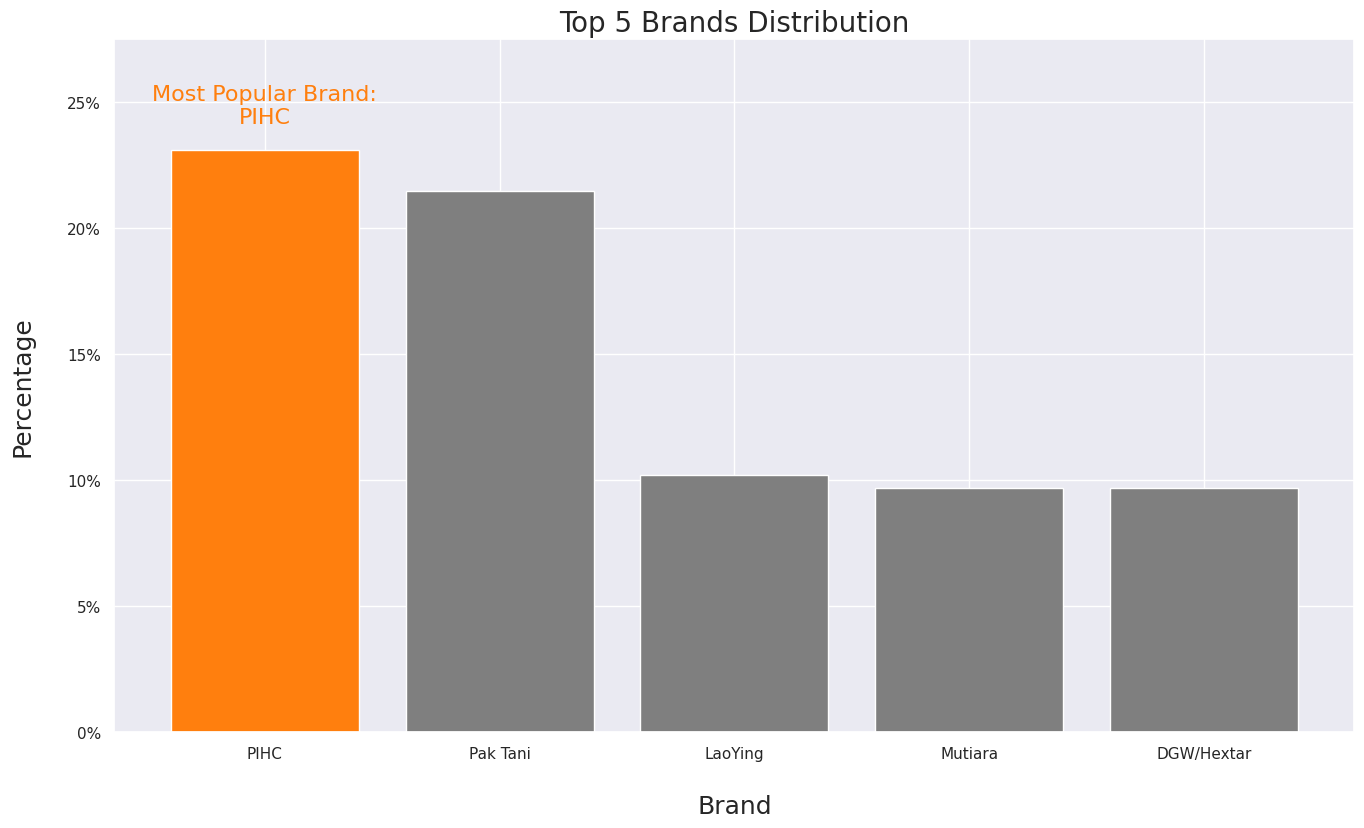

In [18]:
# Define colors for the bars
colors = ['tab:orange' if brand == top_brands.idxmax() else 'tab:gray' for brand in top_brands.index]

# Create the bar chart
plt.figure(figsize=(16, 9))
plt.bar(top_brands.index, top_brands.values, color=colors)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add a title and labels
plt.title('Top 5 Brands Distribution', fontsize=20)
plt.xlabel('\nBrand', fontsize=18)
plt.ylabel('Percentage\n', fontsize=18)
plt.ylim(0, 0.275)

# Add comments
plt.text(
    top_brands.idxmax(),
    top_brands.max(),
    f'Most Popular Brand:\n{top_brands.idxmax()}\n',
    ha='center',
    va='bottom',
    color='tab:orange',
    fontsize=16)

# Show the plot
plt.show()

#### `Type`

In [19]:
Product_Catalog['Type'].unique()

array(['Urea', 'Nitrogen', 'ZA', 'ZK', 'Mikro', 'Fosfat', 'Organik',
       'Majemuk', 'Kalium', 'Mg'], dtype=object)

In [20]:
# Calculate the top 10 types
top_types = Product_Catalog['Type'].value_counts(normalize=True).round(3).nlargest(10)
top_types

Majemuk     0.656
Fosfat      0.091
ZA          0.054
Kalium      0.054
Urea        0.043
Nitrogen    0.043
Mikro       0.027
Mg          0.022
ZK          0.005
Organik     0.005
Name: Type, dtype: float64

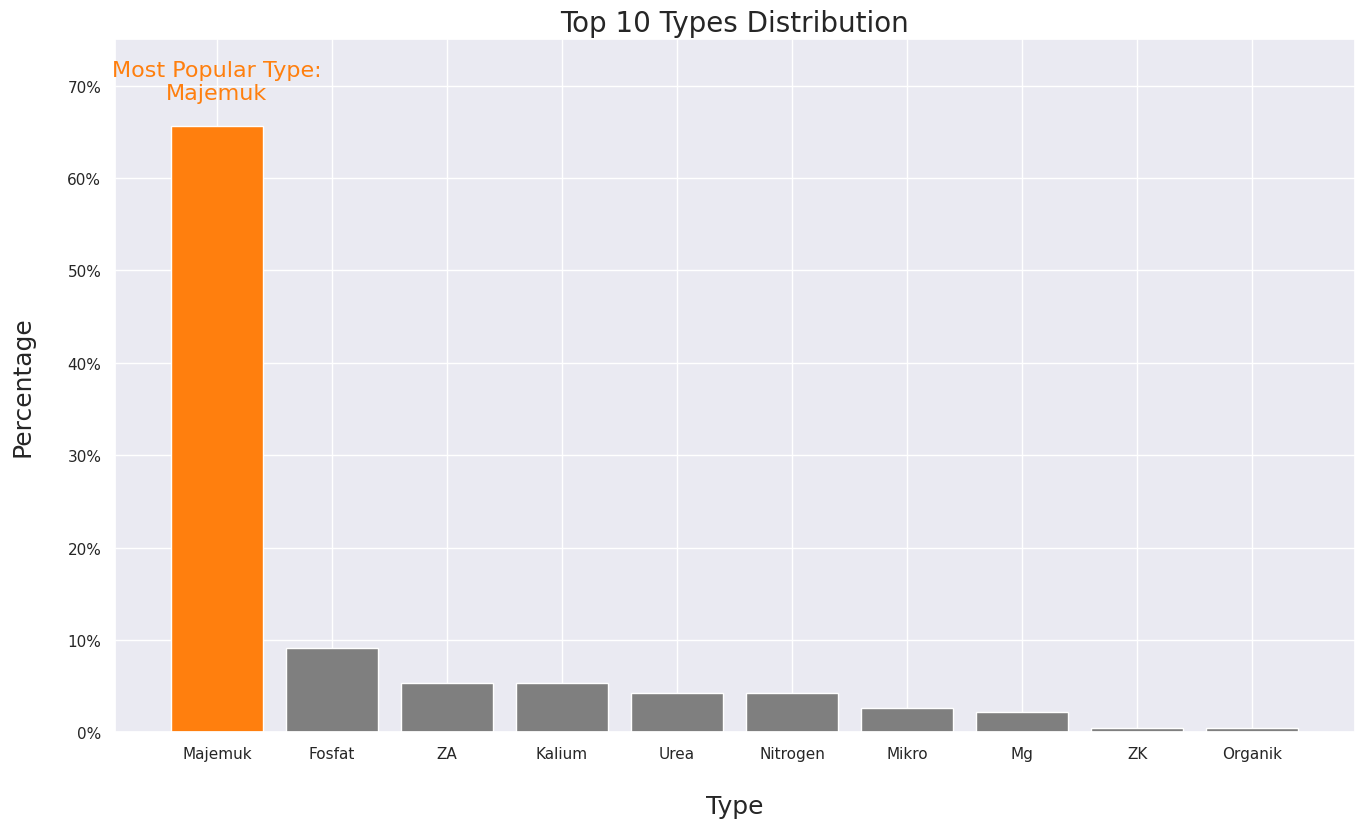

In [21]:
# Define colors for the bars
colors = ['tab:orange' if type == top_types.idxmax() else 'tab:gray' for type in top_types.index]

# Create the bar chart
plt.figure(figsize=(16, 9))
plt.bar(top_types.index, top_types.values, color=colors)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add a title and labels
plt.title('Top 10 Types Distribution', fontsize=20)
plt.xlabel('\nType', fontsize=18)
plt.ylabel('Percentage\n', fontsize=18)
plt.ylim(0, 0.75)

# Add comments
plt.text(
    top_types.idxmax(),
    top_types.max(),
    f'Most Popular Type:\n{top_types.idxmax()}\n',
    ha='center',
    va='bottom',
    color='tab:orange',
    fontsize=16)

# Show the plot
plt.show()

#### `Formula`

In [22]:
# Fill missing values with a placeholder
Product_Catalog.fillna('NA', inplace=True)

# Recheck for missing values
Product_Catalog.isna().sum().sum()

0

In [23]:
# Remove leading spaces in the 'Formula' column
Product_Catalog['Formula'] = Product_Catalog['Formula'].str.strip()

In [24]:
Product_Catalog['Formula'].unique()

array(['NA', '15-15-15', '12-12-17', '12-6-22', '16-16-8', '20-20-0',
       '16-20-0', '16-16-16', '15-9-20', '30-6-8', '28-10-10', '20-10-10',
       '20-10-18', '13-6-27', '18-10-14', '12-11-20', '13-13-24',
       '9-25-25', '15-15-0', '12-61-0', '0-52-34', '8-9-39', '15-15-6',
       '13-8-27', '7-6-35', '15-10-22', '21-14-7', '18-6-14', '18-8-10',
       '20-10-12', '28-6-13', '8-15-19', '9-15-6', '12-6-24', '0-52-32',
       '15-0-15', '12-60-0', '12-12-36', '18-18-18', '6-18-28', '0-16-17',
       '13-0-46', '13.7-0-46.3', '13-11-21', '25-7-7', '12-11-18',
       '18-12-6', '19-9-19', '0-50-35', '18-46-0', '7-6-34', '16-10-18',
       '13-10-20', '15-5-20', '13-11-11', '15-10-20', '15-20-0',
       '20-6-14'], dtype=object)

In [25]:
# Filter out rows where 'Formula' is not 'NA'
non_na_formulas = Product_Catalog[Product_Catalog['Formula'] != 'NA']

# Calculate the top 5 formulas excluding 'NA'
top_formulas = non_na_formulas['Formula'].value_counts(normalize=True).round(3).nlargest(5)
top_formulas

15-15-15    0.123
16-16-16    0.115
12-12-17    0.066
13-6-27     0.057
12-6-22     0.041
Name: Formula, dtype: float64

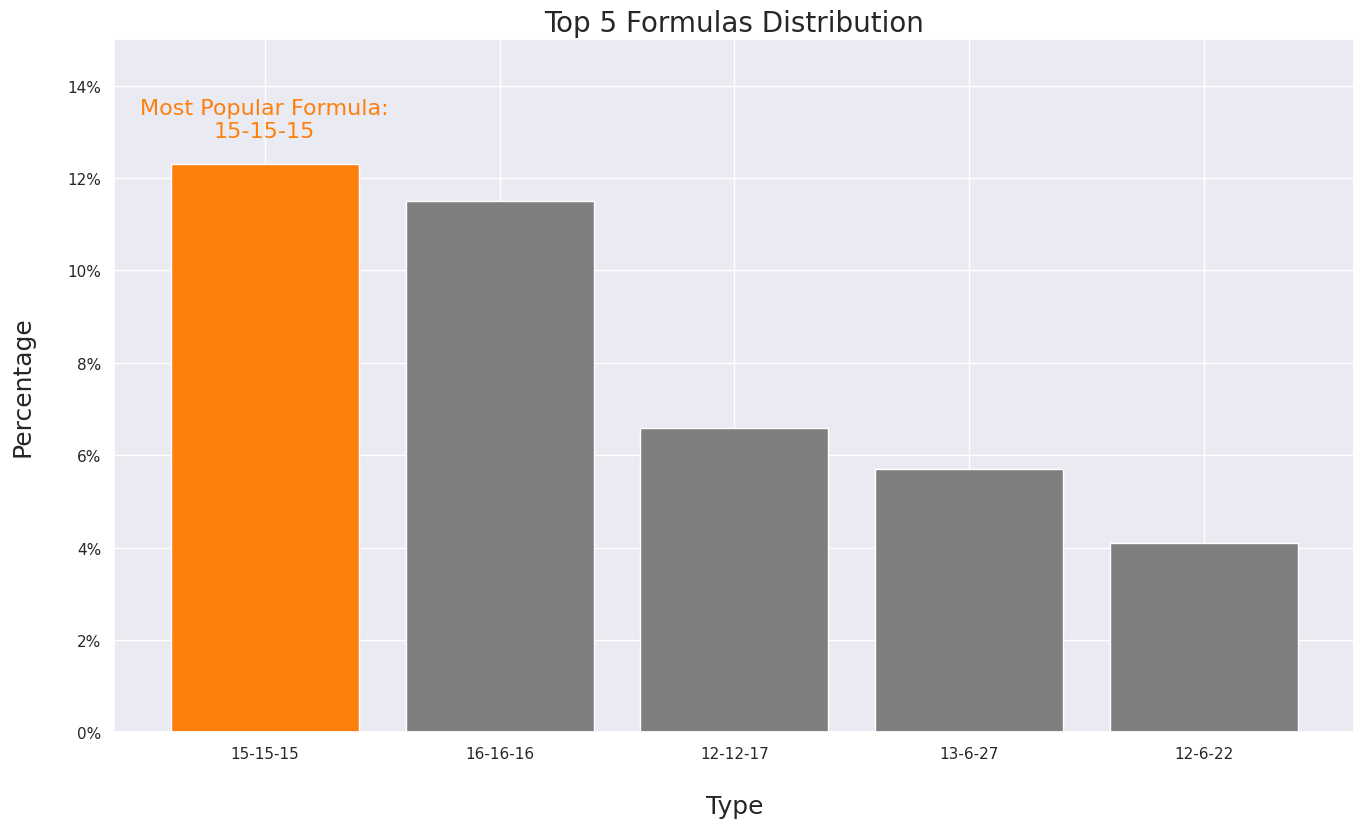

In [26]:
# Define colors for the bars
colors = ['tab:orange' if formula == top_formulas.idxmax() else 'tab:gray' for formula in top_formulas.index]

# Create the bar chart
plt.figure(figsize=(16, 9))
plt.bar(top_formulas.index, top_formulas.values, color=colors)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add a title and labels
plt.title('Top 5 Formulas Distribution', fontsize=20)
plt.xlabel('\nType', fontsize=18)
plt.ylabel('Percentage\n', fontsize=18)
plt.ylim(0, 0.15)

# Add comments
plt.text(
    top_formulas.idxmax(),
    top_formulas.max(),
    f'Most Popular Formula:\n{top_formulas.idxmax()}\n',
    ha='center',
    va='bottom',
    color='tab:orange',
    fontsize=16)

# Show the plot
plt.show()

In [27]:
Product_Catalog[Product_Catalog['Formula'] == ' 15-15-15'].head()

,Product SKU,Brand,Type,Formula


### Product Name

In [28]:
# Look at the first 10 rows
Product_Name.head(10)

,Product Name
0,Pupuk Urea N 46%
1,Pupuk Amonium Sulfat ZA
2,Pupuk Super Fosfat SP-36
3,Pupuk NPK Phonska
4,Pupuk NPK Formula Khusus
5,Pupuk Organik Granul
6,Pupuk Organik Cair
7,Produk Lain
8,Rondap
9,Sekor


In [29]:
Product_Name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44002 entries, 0 to 44001
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  44001 non-null  object
dtypes: object(1)
memory usage: 343.9+ KB


In [30]:
Product_Name.describe()

,Product Name
count,44001
unique,44001
top,Pupuk Urea N 46%
freq,1


In [31]:
# Check the features that have duplicate values
print(Product_Name.duplicated().any())
Product_Name.duplicated().sum()

False


0

In [32]:
# Check for missing values
Product_Name.isna().sum().sum()

1

In [33]:
# Remove rows with missing values
Product_Name.dropna(inplace=True)

# Recheck for missing values
Product_Name.isna().sum().sum()

0

In [34]:
# Extract unique product names and converting them to a list
list_product_names = Product_Name['Product Name'].unique().tolist()

print(list_product_names)
Product_Name['Product Name'].nunique()

['Pupuk Urea N 46%', 'Pupuk Amonium Sulfat ZA', 'Pupuk Super Fosfat SP-36', 'Pupuk NPK Phonska', 'Pupuk NPK Formula Khusus', 'Pupuk Organik Granul', 'Pupuk Organik Cair', 'Produk Lain', 'Rondap', 'Sekor', 'abacel 250ml', 'nitrea', 'spontan', 'Starban', 'gramoxon', 'puradan', 'pastak', 'combitox', 'fujiwan', 'buldok', 'starban 100ml', 'postin/100ml', 'fastak', 'trebon', 'Ronsha', 'sidamethrin', 'DHARMASAN', 'FASTAC', 'ROUNDUP', 'SIDACRON', 'RONSHA 400ML', 'REGENT', 'score', 'sidatan', 'manuver', 'slop. obr', 'sidabas', 'rengt', 'fostin', 'sidacin', 'klocyper', 'Topsida', 'Tebalo', 'fenval', 'Aplaud', 'fatal/keong', 'Dipho', 'Dangke', 'anteb', 'Denox', 'ziput/keong bubuk', 'sampurna B', 'permipos', 'Gramoxone', 'corrtonic 99', 'vanesa/timun', 'Broadpls/ob jkt', 'bnih pare', 'terong', 'Nitrea 50 kg', 'Ally WG ', 'Anti Keong 100 gr', 'BPMC', 'ponskaplus', 'Benjos 5 gr', 'Bentan 80 wp ', 'Bentan 45 wp ', 'Broundplus ', 'Bigrow 10 gr', 'Test', 'naga', 'primaze', 'round up', 'primastrike', 'g

44001

- Examine the words in `Product Name` to see if there are any incorrect entries.

In [35]:
# Convert the list of product names into a pandas Series
product_names_series = pd.Series(list_product_names)

# Extract product words
product_words = product_names_series.str.split().apply(pd.Series, 1).stack()
product_words.index = product_words.index.droplevel(-1)
product_words.name = 'Words'
product_words.head(20)

0      Pupuk
0       Urea
0          N
0        46%
1      Pupuk
1    Amonium
1     Sulfat
1         ZA
2      Pupuk
2      Super
2     Fosfat
2      SP-36
3      Pupuk
3        NPK
3    Phonska
4      Pupuk
4        NPK
4    Formula
4     Khusus
5      Pupuk
Name: Words, dtype: object

In [36]:
product_words.value_counts(normalize=True).head()

ml     0.022265
1      0.016035
100    0.013573
NPK    0.012865
500    0.012005
Name: Words, dtype: float64

In [37]:
product_words.value_counts(normalize=True).tail()

Kolor      0.000008
Erna       0.000008
INDAMIN    0.000008
40GRAM     0.000008
Liberto    0.000008
Name: Words, dtype: float64

In [38]:
# Remove digits
product_words = product_words.str.replace(r'\d+', '', regex=True)

# Remove special characters
product_words = product_words.str.replace(r'[^\w\s]', '', regex=True)

In [39]:
product_words.head(20)

0      Pupuk
0       Urea
0          N
0           
1      Pupuk
1    Amonium
1     Sulfat
1         ZA
2      Pupuk
2      Super
2     Fosfat
2         SP
3      Pupuk
3        NPK
3    Phonska
4      Pupuk
4        NPK
4    Formula
4     Khusus
5      Pupuk
Name: Words, dtype: object

In [40]:
capitalized_product_words = [word.upper() for word in product_words]
capitalized_product_words[:20]

['PUPUK',
 'UREA',
 'N',
 '',
 'PUPUK',
 'AMONIUM',
 'SULFAT',
 'ZA',
 'PUPUK',
 'SUPER',
 'FOSFAT',
 'SP',
 'PUPUK',
 'NPK',
 'PHONSKA',
 'PUPUK',
 'NPK',
 'FORMULA',
 'KHUSUS',
 'PUPUK']

In [41]:
capitalized_product_words = list(filter(lambda word: word != '', capitalized_product_words))
capitalized_product_words[:20]

['PUPUK',
 'UREA',
 'N',
 'PUPUK',
 'AMONIUM',
 'SULFAT',
 'ZA',
 'PUPUK',
 'SUPER',
 'FOSFAT',
 'SP',
 'PUPUK',
 'NPK',
 'PHONSKA',
 'PUPUK',
 'NPK',
 'FORMULA',
 'KHUSUS',
 'PUPUK',
 'ORGANIK']

In [42]:
# Create an empty dictionary to hold categories.
categories = {}

# Iterate through the capitalized words.
for word in capitalized_product_words:
    if len(word) <= 3:
        if len(word) not in categories:
            categories[len(word)] = [word]
        else:
            categories[len(word)].append(word)

# Print the categories.
for length, words in categories.items():
    print(f'Category for words with length {length}: {words}')

Category for words with length 1: ['N', 'B', 'M', 'D', 'D', 'B', 'B', 'N', 'P', 'K', 'P', 'L', 'L', 'K', 'L', 'L', 'B', 'D', 'U', 'B', 'K', 'P', 'P', 'P', 'P', 'B', 'K', 'K', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'K', 'F', 'K', 'K', 'F', 'H', 'K', 'K', 'F', 'F', 'K', 'G', 'L', 'L', 'H', 'H', 'F', 'K', 'K', 'K', 'K', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'K', 'B', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'D', 'B', 'L', 'L', 'B', 'B', 'D', 'B', 'D', 'B', 'D', 'K', 'B', 'D', 'B', 'D', 'G', 'B', 'B', 'D', 'D', 'B', 'D', 'M', 'H', 'K', 'X', 'B', 'K', 'X', 'Z', 'D', 'M', 'M', 'B', 'B', 'K', 'N', 'D', 'C', 'G', 'P', 'L', 'L', 'M', 'C', 'P', 'P', 'B', 'B', 'B', 'D', 'D', 'G', 'K', 'F', 'F', 'F', 'F', 'B', 'K', 'K', 'D', 'B', 'B', 'B', 'B', 'F', 'L', 'V', 'A', 'L', 'L', 'B', 'X', 'L', 'B', 'B', 'F', 'L', 'L', 'K', 'L', 'C', 'F', 'M', 'F', 'G', 'D', 'F', 'F', 'D', 'B', 'B', 'D', 'B', 'B', 'F', 'F', 'D', 'B', 'G', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 

In [43]:
capitalized_product_words_series = pd.Series(capitalized_product_words)

# Count the frequency of each word
word_counts = capitalized_product_words_series.value_counts().reset_index()
word_counts.columns = ['Words', 'Frequency']

# Sort the distinct words by frequency of occurrence
word_counts = word_counts.sort_values(by='Frequency', ascending=False)
word_counts.head(20)

,Words,Frequency
0,ML,7507
1,KG,4912
2,GR,2568
3,NPK,2073
4,L,1561
5,LTR,953
6,LITER,900
7,EC,876
8,SL,847
9,LT,838


In [44]:
# Ensure 'Words' is treated as a Pandas Series of strings
word_counts['Words'] = word_counts['Words'].astype(str)

# Define the list of words to filter
words_to_filter = ['L', 'LT', 'LTR', 'LITER', 'ML',
                   'KG', 'G', 'GR', 'GRM', 'GRAM',
                   'KW', 'KWINTAL', 'KUINTAL', 'T', 'TON']

# Apply the filter
filter_criteria = word_counts['Words'].isin(words_to_filter)

# Get the rows to drop
rows_to_drop = word_counts[filter_criteria].index

# Drop the rows
word_counts = word_counts.drop(rows_to_drop).reset_index(drop=True)
word_counts.head(20)

,Words,Frequency
0,NPK,2073
1,EC,876
2,SL,847
3,WP,720
4,UREA,705
5,SP,627
6,PLUS,539
7,BENIH,538
8,ZA,430
9,X,407


In [45]:
word_counts[word_counts['Words'].str.upper().isin([
    'GRANUL', 'DAUN', 'BUAH',
    'NUTREMAG', 'NUTRISI', 'MIKRO', 'MAKRO',
    'POLIVIT', 'PIM',           # Natural Compound Fertilizer
    'ISKANDAR', 'MUDA', 'ACEH',
    'TUNGGAL', 'MAJEMUK', 'ALAMI', 'ALAM',
    'BIO', 'FERTIL'
    ])]

,Words,Frequency
13,DAUN,368
30,BUAH,276
108,BIO,85
124,GRANUL,75
252,PIM,43
725,NUTRISI,17
737,MAJEMUK,16
1201,MIKRO,11
1266,MAKRO,10
1839,ALAM,7


In [46]:
word_counts[word_counts['Words'].str.upper().isin([
    'ROCK', 'PHOSPATE',
    'NITRALITE',
    'KEBOMAS',
    'TABLET', 'JERANTI',
    'NITROKU', 'PRIMA' # 16-16-16
    ])]

,Words,Frequency
57,PRIMA,155
86,KEBOMAS,104
126,NITROKU,74
600,JERANTI,20
675,TABLET,18
867,PHOSPATE,14
1135,ROCK,11
1589,NITRALITE,8


In [47]:
word_counts[word_counts['Words'].str.upper().isin([
    'KHUSUS', 'TANAMAN', 'COKLAT', # Subsidized Fertilizer
    'PELANGI', 'JOS', 'HAYATI',
    'KALTIM', 'BONTANG',
    'SAHABAT', 'PETANI',
    'PETRO', 'GRESIK',
    'PUSRI', 'SINGKONG', 'KOPI',   # Inorganic Fertilizer
    'TM', 'TBM',                   # Tanaman (Belum) Menghasilkan
    'NS', 'ZA', 'ZK'
    ])]

,Words,Frequency
8,ZA,430
22,PETRO,318
23,NS,313
26,PELANGI,287
90,PUSRI,101
216,KALTIM,48
269,KOPI,41
281,ZK,40
297,COKLAT,38
435,JOS,26


In [48]:
word_counts[word_counts['Words'].str.upper().isin([
    'ORGANIK', 'PETROGANIK', 'PREMIUM',      # Organic Fertilizer
    'EXCOW', 'ECOFERT',
    'BION', 'UP', 'BIORIPAH',
    'PROBIOTIK', 'BIOFEED', 'CHICK', 'FISH', # Probiotics
    'BIODEX', 'KOMPOS', 'GLADIATOR'          # DecomposerS
    'HYDRO', 'PONIC'                         # Hydroponic Fertilizer
    ])]

,Words,Frequency
17,UP,339
115,PREMIUM,80
284,ORGANIK,40
334,BION,33
1285,KOMPOS,10
1574,EXCOW,8
2060,ECOFERT,6
2281,PETROGANIK,5
3328,BIORIPAH,3
3517,FISH,3


References

- https://www.pupuk-indonesia.com/product
- https://sahabatpetani.com/product
- https://petrokimia-gresik.com/product-category/pupuk

In [49]:
word_counts[word_counts['Words'].str.upper().isin([
    'INSEKTISIDA', 'APPLAUD',                  # Pesticide
    'FUNGISIDA', 'SIODAN',
    'HERBISIDA', 'SIDAFOS', 'SEE', 'TOP',
    'SEED', 'HI', 'CORN', 'JAGUNG',            # Seed
    'KALSIPALM', 'CAS', 'CALCIUM', 'SULPHATE', # Ameliorant
    'KAPUR', 'KARBONAT'
    ])]

,Words,Frequency
14,JAGUNG,356
34,TOP,248
178,HERBISIDA,56
185,CAS,54
307,INSEKTISIDA,37
312,KAPUR,37
317,SIDAFOS,36
331,APPLAUD,35
467,SEE,25
555,FUNGISIDA,21


In [50]:
word_counts[word_counts['Words'].str.upper().isin([
    'UREA', 'SP', 'PLUS',
    'NPK', 'PHONSKA',
    'NPS', 'NIPHOS',
    'NITRAT', 'NINGRAT',
    'FOSFAT', 'PHOSGREEN' # Fertilizer
    ])]

,Words,Frequency
0,NPK,2073
4,UREA,705
5,SP,627
6,PLUS,539
45,PHONSKA,193
253,NITRAT,43
386,PHOSGREEN,30
526,NINGRAT,22
1316,FOSFAT,10
2329,NPS,5


In [51]:
word_counts[word_counts['Words'].str.upper().isin([
    'AMONIUM', 'SULFAT', # Raw Materials
    'DAP', 'KCL', 'KUJANG',
    'NITREA', # 46% N
    ])]

,Words,Frequency
24,KCL,301
40,NITREA,222
98,KUJANG,95
468,DAP,24
748,SULFAT,16
1337,AMONIUM,10


In [52]:
word_counts[word_counts['Words'].str.upper().isin([
    'N', 'P', 'K', 'S', 'CA', 'MG',         # Macro-Nutrients
    'CL', 'MN', 'FE', 'CU', 'ZN', 'B', 'MO' # Micro-Nutrients
    ])]

,Words,Frequency
10,B,398
33,K,257
73,P,125
191,MG,52
265,S,41
293,N,39
1250,ZN,10
4699,MO,2
6031,CA,2
9208,CU,1


In [53]:
print(word_counts['Words'].nunique())
word_counts['Words'].unique()

13482


array(['NPK', 'EC', 'SL', ..., 'KALIMAX', 'GRAMAXXON', 'KARUNGBAL'],
      dtype=object)

---

## Natural Language Processing

In [54]:
import re

In [55]:
re.split('\s+', 'Split on spaces.')

['Split', 'on', 'spaces.']

---

## Merge the dataset by specify the column name

---

## Export the dataset

In [56]:
# # Save to CSV
# data.to_csv('DSW_data.csv', index=False)

- Data exploration is now complete!

In [57]:
# Step 1: Text Preprocessing
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Example usage:
sample_text = "Pupuk Urea N 46% is a type of fertilizer."
processed_tokens = preprocess_text(sample_text)
print(processed_tokens)

['pupuk', 'urea', 'n', 'type', 'fertilizer']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply text preprocessing to 'Product Name' column
Product_Name['Product Name'] = Product_Name['Product Name'].apply(preprocess_text)

In [ ]:
Product_Name['Product Name'].head(10)

- Now, the `Product Name` column in the Product Name dataset has been preprocessed.

In [ ]:
# Concatenate 'Brand', 'Type', and 'Formula' columns to create a combined feature
Product_Catalog['Combined Features'] = Product_Catalog['Brand'] + ' ' + Product_Catalog['Type'] + ' ' + Product_Catalog['Formula']

# Optional: Apply the same text preprocessing to 'Combined Features'
Product_Catalog['Combined Features'] = Product_Catalog['Combined Features'].apply(preprocess_text)

In [ ]:
Product_Catalog['Combined Features'].head(10)

- Now, we have a `Combined Features` column that contains the concatenated brand, type, and formula, which can be used for further analysis or mapping.

In [ ]:
# Step 2: Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to both 'Product Name' and 'Combined Features' columns
tfidf_pos = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in Product_Name['Product Name']])
tfidf_catalog = tfidf_vectorizer.transform([' '.join(tokens) for tokens in Product_Catalog['Combined Features']])

- Now, we have TF-IDF vectors for both the `Product Name` data and the `Combined Features` data.
- Next, we can calculate the cosine similarity between the TF-IDF vectors. This will give us a similarity score for each pair of product names and features.

In [ ]:
# Step 3: Similarity Calculation
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
similarity_scores = cosine_similarity(tfidf_pos, tfidf_catalog)

In [ ]:
similarity_scores

- Now, we have the similarity scores calculated and can use them for mapping product names to SKUs in the next step.

In [ ]:
# Step 4: Mapping and SKU Assignment
# Set a threshold for similarity scores to determine if it's a match
threshold = 0.7  # Adjust as needed

# Initialize a list to store predicted SKUs
predicted_skus = []

for i in range(len(similarity_scores)):
    max_similarity_index = similarity_scores[i].argmax()

    if similarity_scores[i][max_similarity_index] >= threshold:
        # If similarity is above threshold, use existing SKU from catalog
        predicted_sku = Product_Catalog['Product SKU'].iloc[max_similarity_index]
    else:
        # Using attributes from the POS product to create a new SKU
        new_sku_attributes = {
            'Brand': Product_Catalog['Brand'].iloc[max_similarity_index],
            'Type': Product_Catalog['Type'].iloc[max_similarity_index],
            'Formula': Product_Catalog['Formula'].iloc[max_similarity_index]
        }

        # Combine attributes to create a new SKU
        proposed_sku = '_'.join([f'{value}' for key, value in new_sku_attributes.items()])
        predicted_sku = proposed_sku

    predicted_skus.append(predicted_sku)

In [ ]:
predicted_skus[:10]

---

## Analysis Report

In [ ]:
# Generate summary statistics
summary_stats = Product_Catalog.describe()
summary_stats

In [ ]:
# Visualize the distribution of 'Brand'
plt.figure(figsize=(16, 9))
sns.countplot(x='Brand', data=Product_Catalog)
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualize the distribution of 'Type'
plt.figure(figsize=(16, 9))
sns.countplot(x='Type', data=Product_Catalog)
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualize the distribution of 'Formula'
plt.figure(figsize=(16, 9))
sns.countplot(x='Formula', data=Product_Catalog)
plt.title('Distribution of Formulas')
plt.xlabel('Formula')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

---

## K-Nearest Neighbors Algorithm

References:
https://www.ibm.com/topics/knn

In [ ]:
# Apply k-Nearest Neighbors (k-NN)
from sklearn.neighbors import NearestNeighbors

# Initialize k-NN model
knn_model = NearestNeighbors(n_neighbors=1, metric='cosine')

# Fit the k-NN model on the TF-IDF vectors of the Product Catalog
knn_model.fit(tfidf_catalog)

In [ ]:
# Predict SKU for Product Names
# Use k-NN to find the nearest SKU for each Product Name
distances, indices = knn_model.kneighbors(tfidf_pos)

# Map the indices to corresponding Product SKUs
predicted_skus = [Product_Catalog['Product SKU'].iloc[i[0]] for i in indices]

In [ ]:
predicted_skus[:10]